In [1]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
def plot_MinMaxAvg(data,figsize=(12,4)):
    """Plot mean values of data columns with min and max values"""
    average = data.mean(axis=0)
    st_deviation = data.std(axis=0)
    min_values = data.min(axis=0)
    max_values = data.max(axis=0)
    fig, ax = plt.subplots(figsize=figsize)
    ax.errorbar(np.arange(average.shape[0]), average, st_deviation, fmt='ok', lw=3)
    ax.errorbar(np.arange(average.shape[0]), average, [min_values,max_values], fmt='.k', ecolor='grey', lw=1)
    average.shape

# Creating dataset

* Zrodlo danych: Sentinel
* Konwerscja JP2 do PNG: Ręcznie / Skrypt na ubuntu
* Klasyfikacja terenu na podstawie Open Street Map: Natural water, Landuse forest, Landuse farmland

Read files from data folder

In [3]:
files = os.listdir('Data')
columns_names = []
x_size, y_size = cv2.imread(os.path.join('Data', files[0])).shape[:2]

In [4]:
X = np.zeros((x_size,y_size,len(files)))
for i, file in enumerate(files):
    columns_names.append(file[-7:-4])
    X[...,i] = cv2.imread(os.path.join('Data', file), cv2.IMREAD_UNCHANGED)
data = X.reshape((x_size*y_size, len(files)))

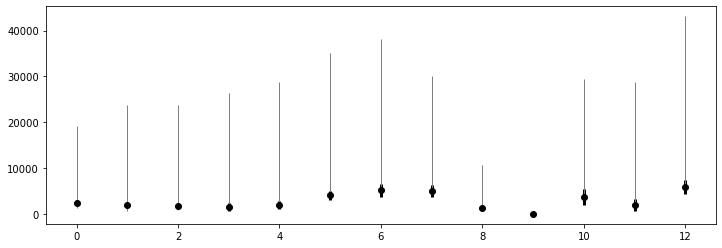

In [5]:
plot_MinMaxAvg(data)

Dealing with outstanding data $ x = min(x,\overline{x}+3\sigma_{x}) $

In [6]:
for i in range(data.shape[1]):
    max_value = np.mean(data[:, i]) + 3*np.std(data[:, i])
    data[:, i] = (np.where(data[:, i] < max_value, data[:, i], max_value))

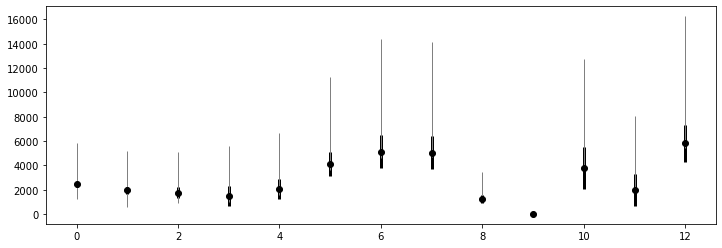

In [7]:
plot_MinMaxAvg(data)

Normalisation
* Normalisation should be done on training and test separetly but ...

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
data = sc.fit_transform(data)

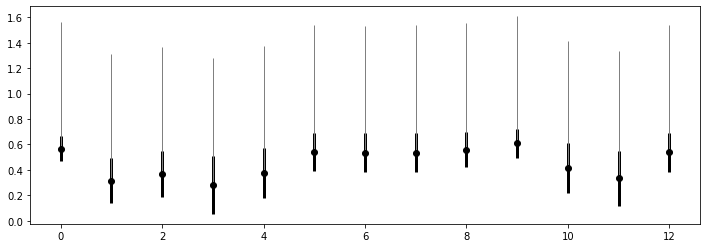

In [9]:
plot_MinMaxAvg(data)

Read classes from Classification.png

In [10]:
classes = cv2.imread('Classification.png')[:x_size, :y_size]
classes = classes.reshape((x_size*y_size, 3))
classes = (classes/255).astype(int)
other = (1 - classes.any(axis=1).astype(int)).reshape(-1,1)
columns_names += ['water', 'forest', 'fields', 'other']

Saving data to csv file

In [11]:
data = np.concatenate((data, classes, other), axis=1)
data = pd.DataFrame(data, columns=columns_names)
data.to_csv('data.csv')